In [4]:
import sys
import pandas as pd
import logging, datetime, os
from sklearn.cluster import KMeans
import warnings
from sklearn import preprocessing

#%config Application.log_level="INFO"
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
warnings.simplefilter('ignore')

## Кластеризация

In [17]:
# клиенты с одним продуктом (выгрузка из базы)
#file_name = 'clients_clustering.csv'

# клиенты с несколькими продуктами (результат классификации платежек)
#file_name = 'multiproduct_clients_clustering.csv'

# клиенты с одним продуктом (результат классификации платежек)
file_name = 'one_product_clients_clustering.csv'

# Инициализация массива даных:
    
data = pd.read_csv(file_name, encoding='cp1251', delimiter=';')
data = data.rename(columns = {"PREDICTED" : "CLASS"})
data = data.dropna(subset=['CLASS'])

# Список продуктов

labels = sorted(list(data['CLASS'].drop_duplicates()))

# Формируем данные для кластеризации

data['COUNT']=1
grouped=data.groupby(['INN', 'CLASS']).count().reset_index(level=1)
data_for_clustering = grouped.pivot( columns='CLASS', values='COUNT').fillna(0)

# Нормализуем численные значения

data_values = data_for_clustering[labels].values
scaler = preprocessing.Normalizer()
standardscaler = preprocessing.StandardScaler()
#data_for_clustering[labels] = scaler.fit_transform(data_values)
data_for_clustering[labels] = standardscaler.fit_transform(scaler.fit_transform(data_values))
data_for_clustering = data_for_clustering.reset_index()


# Кластеризация

text_clf_lr = KMeans(n_clusters = 25,random_state=0).fit(data_for_clustering[labels])
data_for_clustering['CLUSTER'] = text_clf_lr.predict(data_for_clustering[labels])

## Выводим наиболее часто встречаемые в кластерах продукты

In [18]:
# Получаем наиболее часто встречаемое в кластере название продукта
def get_cluster_name(df):
    return df[labels].sum().sort_values(ascending = False).head(n = 1).index[0]

# Выводим наиболее часто встречаемое в кластере название продукта, номер кластера и количество ИНН в нем

print('Результат кластеризации: \n')
lst = []
for i in range(len(labels)):
    cluster = data_for_clustering.loc[data_for_clustering['CLUSTER'] == i]
    lst.append([get_cluster_name(cluster) , i ,  len(cluster)])
lst.sort()
for rec in lst:
    print(rec)

# Выводим продукт и количество ИНН у которых имеются платежки по нему:

print('\nИсходные данные: \n')    
for label in labels:
    print(label, ' : ', len(data_for_clustering[data_for_clustering[label] > 0 ]))    

Результат кластеризации: 

['Автозапчасти', 12, 389]
['Автомобили', 18, 251]
['Бытовая техника', 24, 42]
['Бытовая химия', 20, 213]
['ГСМ', 4, 287]
['Канцелярский', 16, 407]
['Компьютерное оборудование', 23, 33]
['Мебель', 1, 876]
['Медицинский', 9, 310]
['Мусор', 0, 6206]
['Оборудование', 22, 251]
['Одежда', 10, 296]
['Оказание услуг по проведению лабораторных исследований', 15, 176]
['Оргтехника', 3, 730]
['Охрана', 7, 294]
['Оценка условий труда', 2, 304]
['Печатная продукция', 8, 386]
['Питание', 5, 407]
['Ремонт', 6, 736]
['Сантехника', 14, 256]
['Страхование', 13, 130]
['Строительные материалы', 19, 376]
['Финансовый аудит', 11, 408]
['Хозяйственный', 17, 310]
['Электротовары', 21, 251]

Исходные данные: 

Автозапчасти  :  782
Автомобили  :  608
Бытовая техника  :  243
Бытовая химия  :  783
ГСМ  :  497
Канцелярский  :  862
Компьютерное оборудование  :  265
Мебель  :  1715
Медицинский  :  989
Мусор  :  8483
Оборудование  :  829
Одежда  :  550
Оказание услуг по проведению лаборатор

## Выводим среднее по колонкам кластеров

In [9]:
for i in range(len(labels)):
    for label in labels:
        print('Mean of ',
              i,
              ' cluster of ',
              label,
              ' column: ',
              data_for_clustering[data_for_clustering['CLUSTER'] == i][label].mean())

Mean of  0  cluster of  Автозапчасти  column:  -0.14709678371279072
Mean of  0  cluster of  Автомобили  column:  -0.10975312593173425
Mean of  0  cluster of  Бытовая техника  column:  -0.04398388005261788
Mean of  0  cluster of  Бытовая химия  column:  -0.11168415506985342
Mean of  0  cluster of  ГСМ  column:  -0.1329155807772869
Mean of  0  cluster of  Канцелярский  column:  -0.16822113827059212
Mean of  0  cluster of  Компьютерное оборудование  column:  -0.04736606774919907
Mean of  0  cluster of  Мебель  column:  -0.22111795511338028
Mean of  0  cluster of  Медицинский  column:  -0.1352614708916523
Mean of  0  cluster of  Мусор  column:  0.9039175228775241
Mean of  0  cluster of  Оборудование  column:  -0.10750824174452203
Mean of  0  cluster of  Одежда  column:  -0.128044108044428
Mean of  0  cluster of  Оказание услуг по проведению лабораторных исследований  column:  -0.10012587364678367
Mean of  0  cluster of  Оргтехника  column:  -0.21389022509822805
Mean of  0  cluster of  Охра

Mean of  8  cluster of  Канцелярский  column:  -0.04284612101236765
Mean of  8  cluster of  Компьютерное оборудование  column:  -0.06742757373070996
Mean of  8  cluster of  Мебель  column:  -0.27648596906491557
Mean of  8  cluster of  Медицинский  column:  -0.17377560011724336
Mean of  8  cluster of  Мусор  column:  -0.48898803128175655
Mean of  8  cluster of  Оборудование  column:  -0.1511579718548101
Mean of  8  cluster of  Одежда  column:  -0.15312057767737383
Mean of  8  cluster of  Оказание услуг по проведению лабораторных исследований  column:  -0.10774756491437508
Mean of  8  cluster of  Оргтехника  column:  -0.24783808077787284
Mean of  8  cluster of  Охрана  column:  -0.1562563606191299
Mean of  8  cluster of  Оценка условий труда  column:  -0.15472361165080584
Mean of  8  cluster of  Печатная продукция  column:  5.762392253129251
Mean of  8  cluster of  Питание  column:  -0.1704601026205989
Mean of  8  cluster of  Ремонт  column:  -0.2561752528021017
Mean of  8  cluster of  С

Mean of  14  cluster of  Хозяйственный  column:  -0.16147840562181545
Mean of  14  cluster of  Электротовары  column:  -0.11826583354717786
Mean of  15  cluster of  Автозапчасти  column:  -0.1906988261391918
Mean of  15  cluster of  Автомобили  column:  -0.14770824006583985
Mean of  15  cluster of  Бытовая техника  column:  -0.06637863923974924
Mean of  15  cluster of  Бытовая химия  column:  -0.1399588285759638
Mean of  15  cluster of  ГСМ  column:  -0.15760658412541698
Mean of  15  cluster of  Канцелярский  column:  -0.20009598064751674
Mean of  15  cluster of  Компьютерное оборудование  column:  -0.06879096453786718
Mean of  15  cluster of  Мебель  column:  -0.2644501319306953
Mean of  15  cluster of  Медицинский  column:  -0.03800212328901019
Mean of  15  cluster of  Мусор  column:  -0.6209649634521669
Mean of  15  cluster of  Оборудование  column:  -0.1375904905366917
Mean of  15  cluster of  Одежда  column:  -0.15525366890060519
Mean of  15  cluster of  Оказание услуг по проведен

Mean of  24  cluster of  Компьютерное оборудование  column:  0.14863260292355823
Mean of  24  cluster of  Мебель  column:  -0.17060589452977842
Mean of  24  cluster of  Медицинский  column:  -0.16084659244242003
Mean of  24  cluster of  Мусор  column:  -0.2007255637743582
Mean of  24  cluster of  Оборудование  column:  0.09731495793064238
Mean of  24  cluster of  Одежда  column:  -0.04752510095203168
Mean of  24  cluster of  Оказание услуг по проведению лабораторных исследований  column:  -0.1336146000840496
Mean of  24  cluster of  Оргтехника  column:  -0.10358650092730028
Mean of  24  cluster of  Охрана  column:  -0.15397758905853326
Mean of  24  cluster of  Оценка условий труда  column:  -0.15870149675727682
Mean of  24  cluster of  Печатная продукция  column:  -0.17813124919966028
Mean of  24  cluster of  Питание  column:  -0.1828050172158802
Mean of  24  cluster of  Ремонт  column:  -0.24719478723814314
Mean of  24  cluster of  Сантехника  column:  0.02167540522439932
Mean of  24 

In [11]:
data_for_clustering[data_for_clustering['CLUSTER'] == 0]

CLASS,INN,Автозапчасти,Автомобили,Бытовая техника,Бытовая химия,ГСМ,Канцелярский,Компьютерное оборудование,Мебель,Медицинский,...,Печатная продукция,Питание,Ремонт,Сантехника,Страхование,Строительные материалы,Финансовый аудит,Хозяйственный,Электротовары,CLUSTER
1,105004524,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,1.925194,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
3,105045383,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.031956,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
9,105066425,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
10,105067884,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
13,105072740,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
16,105077000,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
20,107013299,0.676082,2.042833,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
23,107023480,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.120090,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
25,107032950,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0
26,107033217,-0.193359,-0.160172,-0.077257,-0.165096,-0.158963,-0.203642,-0.071407,-0.320611,-0.199089,...,-0.183044,-0.182805,-0.279727,-0.161134,-0.108012,-0.204704,-0.177151,-0.195520,-0.185377,0


## PCA

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

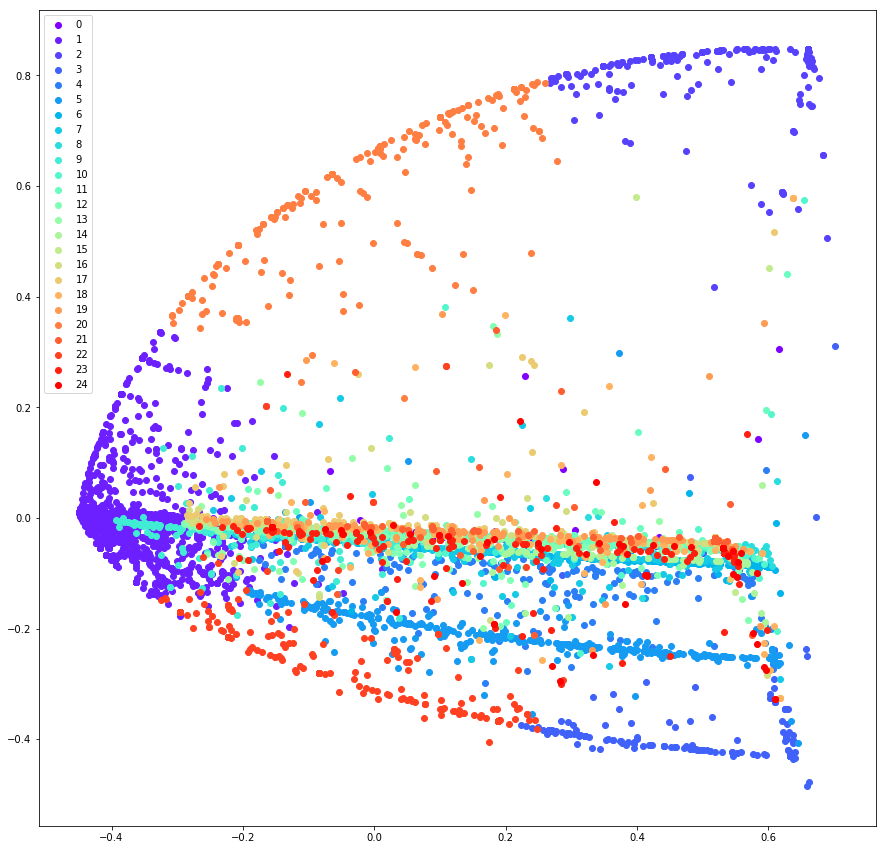

In [79]:
centers = text_clf_lr.cluster_centers_
pca = PCA(n_components = 2)

transformed = pd.DataFrame(pca.fit_transform(data_for_clustering[labels]))
colors = cm.rainbow(np.linspace(0,1,25))

plt.figure(figsize=(15,15))
for cluster,col in zip(list(data_for_clustering['CLUSTER'].drop_duplicates().sort_values()),colors):
    plt.scatter(transformed[data_for_clustering['CLUSTER'] == cluster][0],
                transformed[data_for_clustering['CLUSTER'] == cluster][1],
                label = cluster,
                c=col)
plt.legend()
plt.show()